## Forecast the CocaCola prices data set

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [75]:
# Loading Dataset
data = pd.read_excel('downloads/CocaCola_Sales_Rawdata.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [76]:
data.shape

(42, 2)

In [77]:
data['Quarters']=data.Quarter.str.split('_',expand=True)[0]
data['Years'] = data.Quarter.str.split('_',expand=True)[1]

In [78]:
data.head()

,Quarter,Sales,Quarters,Years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [79]:
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters'],drop_first=True))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data.head()

,Quarter,Sales,Quarters,Years,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,0,0,0
1,Q2_86,2244.960999,Q2,86,1,0,0
2,Q3_86,2533.804993,Q3,86,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,1
4,Q1_87,1547.818996,Q1,87,0,0,0


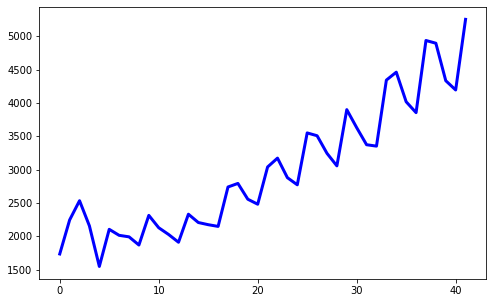

In [80]:
plt.figure(figsize=(8,5))
plt.plot(data['Sales'], color = 'blue', linewidth=3)

<AxesSubplot:>

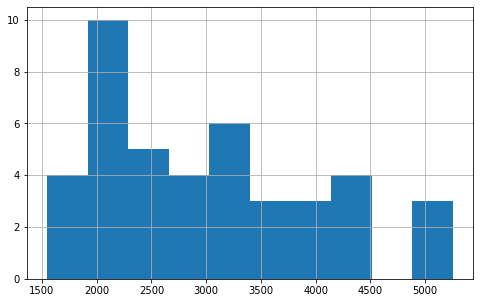

In [81]:
data['Sales'].hist(figsize=(8,5))

<AxesSubplot:ylabel='Density'>

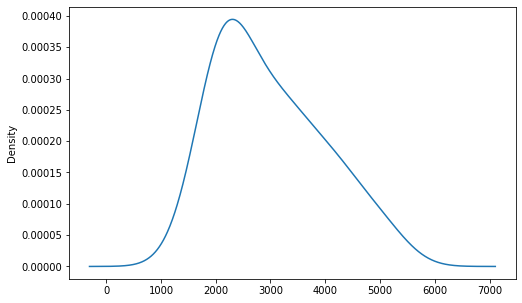

In [82]:
# Density Plot
data['Sales'].plot(kind = 'kde', figsize=(8,5))

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

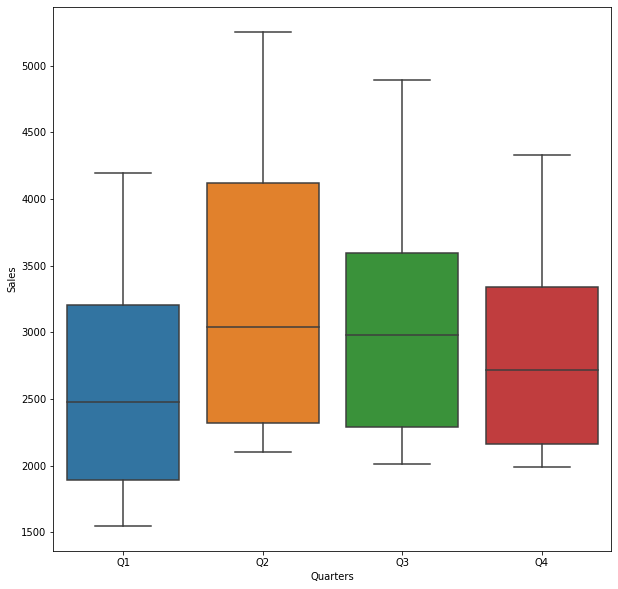

In [83]:
sns.boxplot(x="Quarters",y="Sales",data=data)


<AxesSubplot:xlabel='Years', ylabel='Sales'>

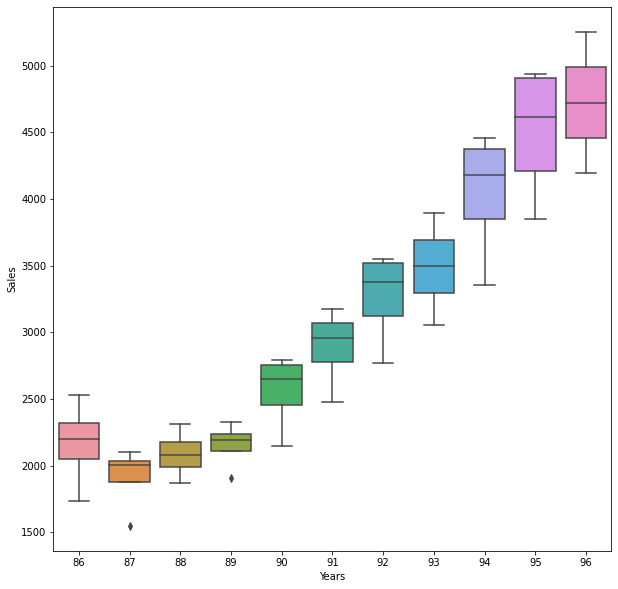

In [84]:
sns.boxplot(x="Years",y="Sales",data=data)

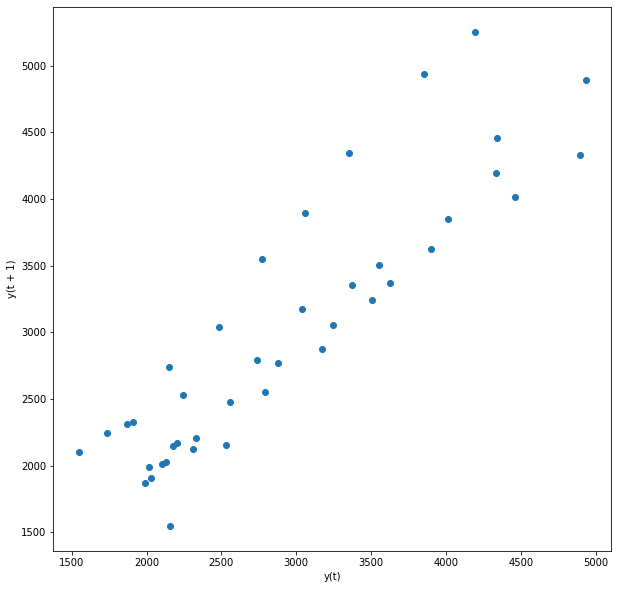

In [85]:
from pandas.plotting import lag_plot
lag_plot(data['Sales'])
plt.show()

<AxesSubplot:xlabel='Years', ylabel='Sales'>

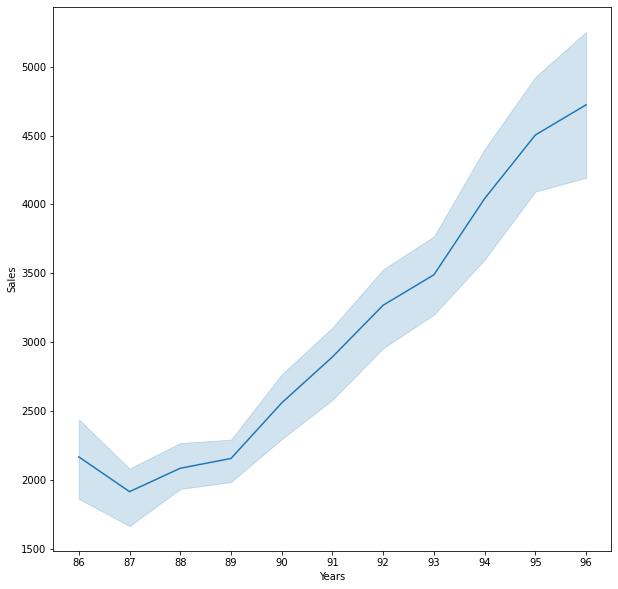

In [86]:
sns.lineplot(x="Years",y="Sales",data=data)

<AxesSubplot:xlabel='Quarters', ylabel='Years'>

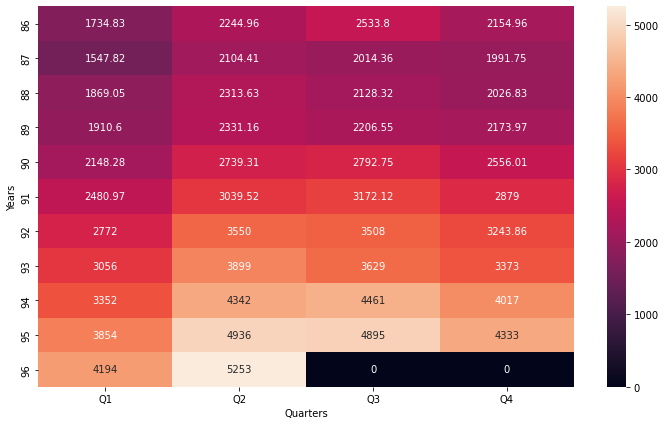

In [87]:
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Years",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

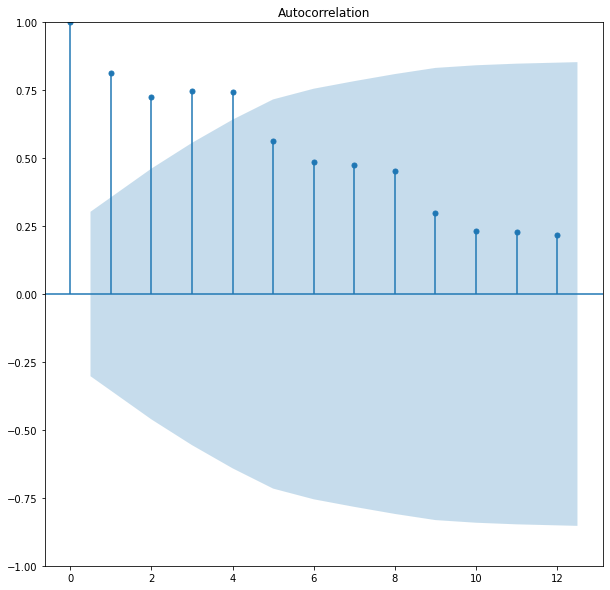

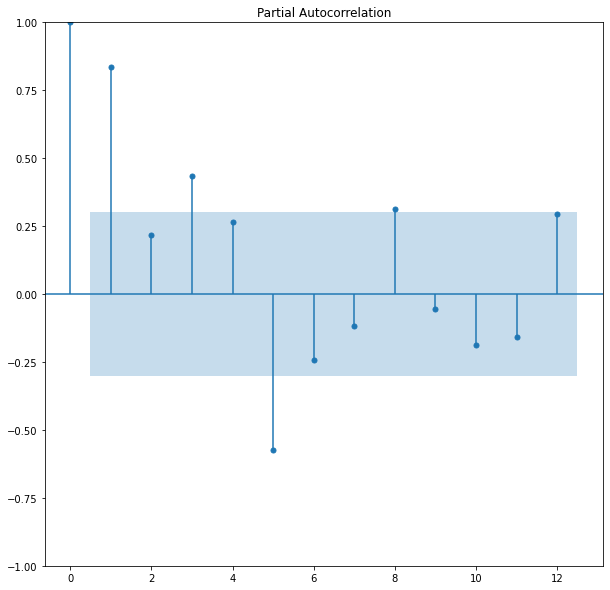

In [88]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

In [89]:
# Forecasting Methods

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [90]:
Train = data.head(32)
Test = data.tail(10)

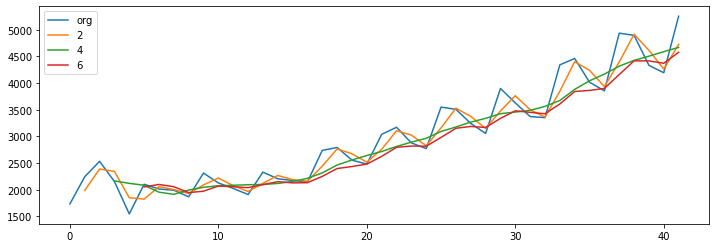

In [91]:
# Moving Average Method

plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

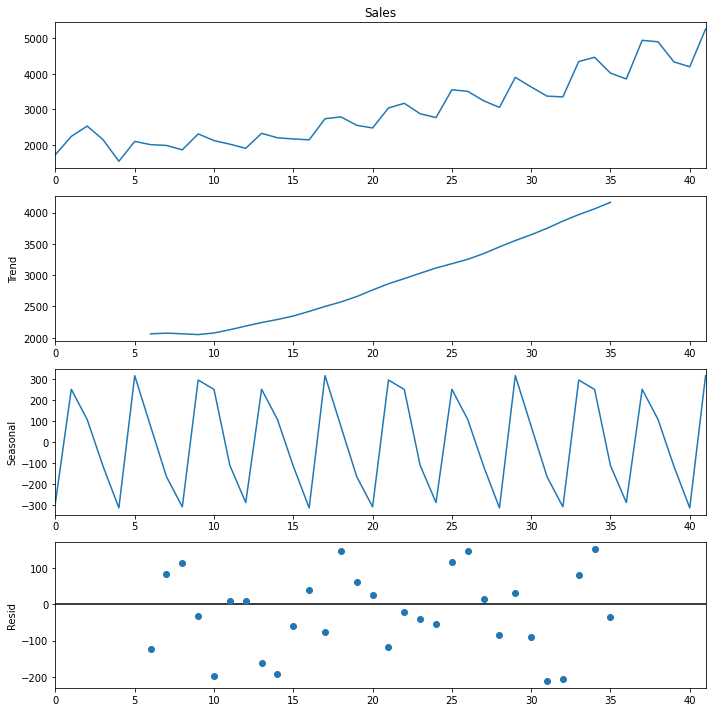

In [92]:
# Time series decomposition plot

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [93]:
# RMSE

def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [94]:
# Simple Exponential Method

In [95]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

1034.9359056453961

In [96]:
# Holt method

In [97]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

941.6367810616845

In [98]:
# Holts winter exponential smoothing with additive seasonality and additive trend

In [99]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

610.2556035853422

In [100]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [101]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

566.0149513940495

In [102]:
#Model based Forecasting Methods

# Data preprocessing for models
data["t"] = np.arange(1,43)
data["t_squared"] = data["t"]*data["t"]

data["log_sales"] = np.log(data["Sales"])

data.head()

,Quarter,Sales,Quarters,Years,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,0,0,0,5,25,7.344602


In [103]:
Train = data.head(32)
Test = data.tail(10)

In [104]:
# Linear Model

import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767132

In [105]:
#Exponential Model

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076668

In [106]:
# Quadratic Model

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.7357355407288

In [107]:
# Additive Seasonality model

add_sea = smf.ols('Sales~Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q2', 'Q3', 'Q4']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.4665461858353

In [108]:
# Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Sales~t+t_squared+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model 

277.3510771128662

In [109]:
# Multiplicative Seasonality model

Mul_sea = smf.ols('log_sales~Q2+Q3+Q4',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.2503948361134

In [110]:
# Multiplicative Additive Seasonality model

Mul_Add_sea = smf.ols('log_sales~t+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea = RMSE(Test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.867818269206

In [111]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

In [112]:
data1 = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 

In [113]:
data1

,Model,RMSE_Value
0,Simple Exponential Method,1034.935906
1,Holt method,941.636781
2,HW exp smoothing add,610.255604
3,HW exp smoothing mult,566.014951
4,Linear Mode,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


In [114]:
# Building final model with least RMSE value

In [115]:
final_model = smf.ols('Sales~t+t_squared+Q2+Q3+Q4',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['Q2','Q3','Q4','t','t_squared']]))
rmse_final_model = RMSE(data['Sales'], pred_final)
rmse_final_model

159.05522576522475

In [116]:
pred_data = pd.DataFrame({'Actual' : data.Sales, 'Predicted' : pred_final})
pred_data.head()

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143


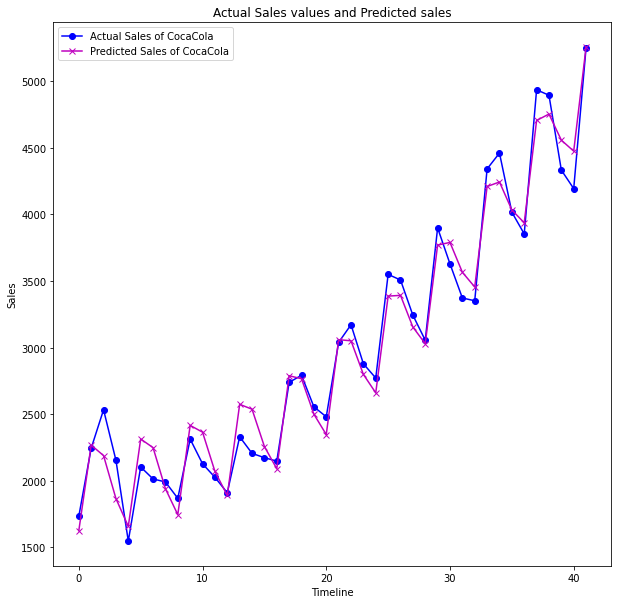

In [117]:
# Plot of Actual Sales values and Predicted sales values

plt.plot(data.Sales, color='b',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

# Added titles and adjust dimensions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (10,10) 

plt.show()